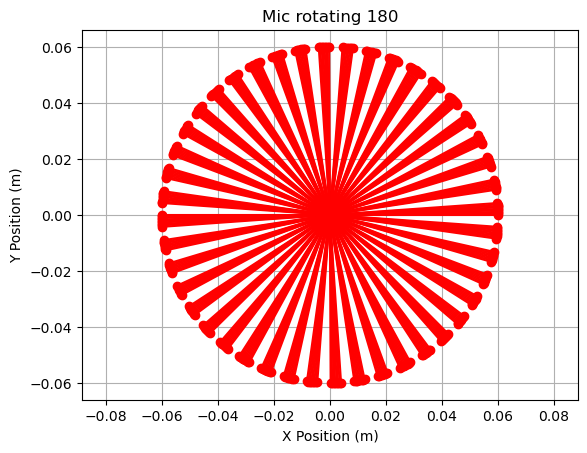

In [29]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import spectrogram
from IPython.display import Audio
from scipy import signal
from scipy.fft import fft, ifft
from scipy.signal import correlate


# Microphone positions
mic1_initial = np.array([-0.06, 0])   # Mic 1 at [-1, 0]
mic2_initial = np.array([0.06, 0])    # Mic 2 at [1, 0]
mic_distance = np.linalg.norm(mic2_initial - mic1_initial)  # Distance between microphones
midpoint = (mic1_initial + mic2_initial) / 2  # Midpoint between mic 1 and mic 2
 

def mic_rotation(angle_to_rotate, midpoint):
    mic1_rotated = midpoint + (mic_distance / 2) * np.array([np.cos(angle_to_rotate), np.sin(angle_to_rotate)])
    mic2_rotated = midpoint + (-mic_distance / 2) * np.array([np.cos(angle_to_rotate), np.sin(angle_to_rotate)])
    
    return mic1_rotated, mic2_rotated

for i in range(0, 180, 1):
    mic1_rotated, mic2_rotated = mic_rotation(i, midpoint)
    plt.plot([mic1_rotated[0], mic2_rotated[0]], [mic1_rotated[1], mic2_rotated[1]], 'ro-')        

plt.xlabel("X Position (m)")
plt.ylabel("Y Position (m)")
plt.title("Mic rotating 180")
plt.grid(True)
plt.axis('equal')
plt.show()


In [ ]:
# Sound source positions
sound_sources = [np.array([0, 10])] 

# Load the audio file
# Load the audio file
folder_path = r'Bird_sound'
filename = "call1.wav"
file_path = os.path.join(folder_path, filename)

SR, z = wavfile.read(file_path)
# Play audio
Audio(z, rate=SR) 

# Normalised Audio
z = z / np.max(np.abs(z))
signal_A = z